In [16]:
!pip install wordcloud
!pip install stopword

  Obtaining dependency information for stopword from https://files.pythonhosted.org/packages/2c/3c/a464a65bf383afb01fc51a8e7e6fc8ffc74c8f4277e67a5d9d52dc4f974e/stopword-0.0.4-py3-none-any.whl.metadata


In [28]:
import pandas as pd
import seaborn as sns
import  numpy as np
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
from PIL import Image
import requests

In [29]:
df=pd.read_csv('C:/Users/RUTU/Desktop/Data Science/DS_New Assi/blogs.csv')
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


### Data Exploration and Preprocessing

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [20]:
df.describe()

,Data,Labels
count,2000,2000
unique,2000,20
top,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
freq,1,100


In [37]:
df.isna().sum()

Data      0
Labels    0
dtype: int64

### Visualization

<Axes: xlabel='count', ylabel='Labels'>

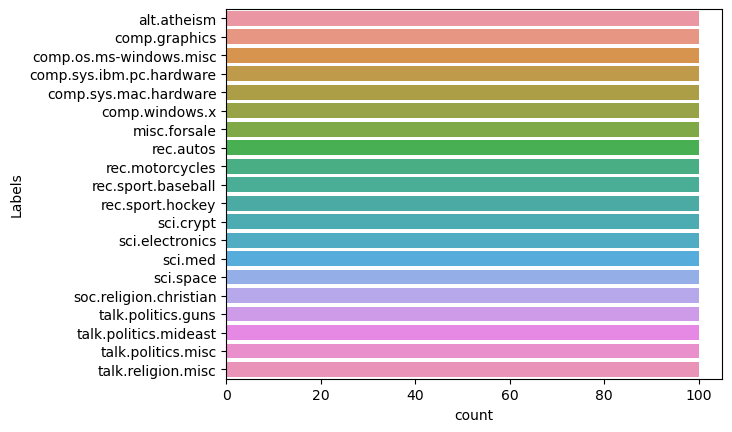

In [21]:
sns.countplot(y = df['Labels'])

In [52]:
df['label'] = df['Labels'].map({'alt.atheism':0,'comp.graphics':1,'comp.os.ms-windows.misc':2,'comp.sys.ibm.pc.hardware':3})

In [53]:
df

,Data,Labels,label
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,0.0
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,0.0
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,0.0
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,0.0
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,0.0
...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,NaN
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,NaN
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc,NaN
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,NaN


In [57]:
df[df['Labels'] == 'alt.atheism']

,Data,Labels,label
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,0.0
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,0.0
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,0.0
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,0.0
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,0.0
...,...,...,...
95,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,0.0
96,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,0.0
97,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,alt.atheism,0.0
98,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,0.0


In [55]:
df[df['Labels'] == 'comp.graphics']

,Data,Labels,label
100,Newsgroups: comp.graphics\nPath: cantaloupe.sr...,comp.graphics,1.0
101,Newsgroups: comp.graphics\nPath: cantaloupe.sr...,comp.graphics,1.0
102,Path: cantaloupe.srv.cs.cmu.edu!rochester!udel...,comp.graphics,1.0
103,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,comp.graphics,1.0
104,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,comp.graphics,1.0
...,...,...,...
195,Path: cantaloupe.srv.cs.cmu.edu!rochester!corn...,comp.graphics,1.0
196,Xref: cantaloupe.srv.cs.cmu.edu comp.sys.sgi.m...,comp.graphics,1.0
197,Xref: cantaloupe.srv.cs.cmu.edu comp.graphics:...,comp.graphics,1.0
198,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,comp.graphics,1.0


In [56]:
df[df['Labels'] == 'comp.os.ms-windows.misc']

,Data,Labels,label
200,Path: cantaloupe.srv.cs.cmu.edu!rochester!udel...,comp.os.ms-windows.misc,2.0
201,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,comp.os.ms-windows.misc,2.0
202,Xref: cantaloupe.srv.cs.cmu.edu comp.os.ms-win...,comp.os.ms-windows.misc,2.0
203,Xref: cantaloupe.srv.cs.cmu.edu comp.os.ms-win...,comp.os.ms-windows.misc,2.0
204,Newsgroups: comp.os.ms-windows.misc\nPath: can...,comp.os.ms-windows.misc,2.0
...,...,...,...
295,Newsgroups: comp.os.ms-windows.misc\nPath: can...,comp.os.ms-windows.misc,2.0
296,Xref: cantaloupe.srv.cs.cmu.edu comp.periphs.p...,comp.os.ms-windows.misc,2.0
297,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,comp.os.ms-windows.misc,2.0
298,Newsgroups: comp.os.ms-windows.misc\nPath: can...,comp.os.ms-windows.misc,2.0


In [58]:
atheism= df[df['Labels'] == 'alt.atheism']
graphics= df[df['Labels'] == 'comp.graphics']
windows= df[df['Labels'] == 'comp.os.ms-windows.misc']

In [49]:
def worldcl(data,heading):
    txt = ' '.join(data['Data'])
    wc = WordCloud(background_color='white',width=700, height=200,
                  colormap='viridis').generate(txt)
    plt.imshow(wc)
    plt.axis('off')
    plt.title(heading)

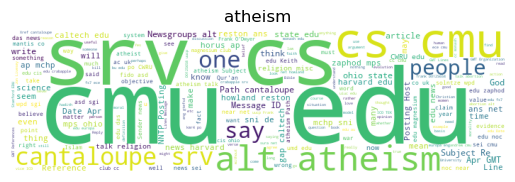

In [50]:
worldcl(atheism,'atheism')

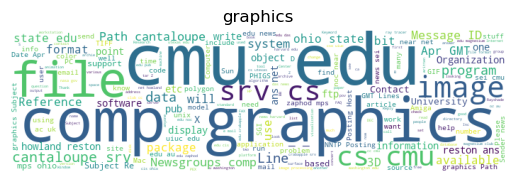

In [60]:
worldcl(graphics,'graphics')

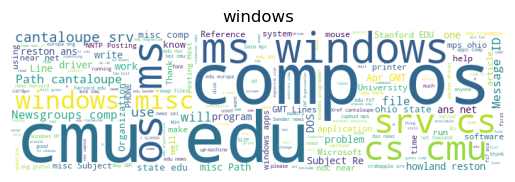

In [61]:
worldcl(windows,'windows')

In [ ]:
# Display the number of unique categories
print(f"Number of unique categories: {df['Labels'].nunique()}")

# Display the distribution of categories
print(df['Labels'].value_counts())


In [ ]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply the preprocessing function to the data
df['Cleaned_Data'] = df['Data'].apply(preprocess_text)

# Display the first few rows of the preprocessed data
print(df.head())


In [ ]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the cleaned text data
X = tfidf_vectorizer.fit_transform(df['Cleaned_Data'])

# Convert labels to numerical format
y = df['Labels']


In [ ]:
df

### Naive Bayes Model for Text Classification

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the model
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)


### Sentiment Analysis

In [ ]:
!pip install textblob


In [ ]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    # Classify the sentiment
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment analysis function to the original text data
df['Sentiment'] = df['Data'].apply(get_sentiment)

# Display the first few rows with sentiment
print(df.head())


In [ ]:
# Display the distribution of sentiments across different categories
sentiment_distribution = df.groupby('Labels')['Sentiment'].value_counts(normalize=True).unstack().fillna(0)
print(sentiment_distribution)


### Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


In [ ]:
# Summarize findings from sentiment analysis
print("Sentiment Analysis Summary:")
print(sentiment_distribution)
